In [1]:
# imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import pickle
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim
import torch.nn.functional as F


import os

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


# Data Processing

# Convolution Neural Network

# Training Loop

In [3]:
# 2d spectrogram area BELOW

spectro_data_dict = {}
with open('C:/Users/privateal/Desktop/hms-harmful-brain-activity-classification/saved_spectro_dict.pkl', 'rb') as f:
    spectro_data_dict = pickle.load(f)

# spectro_train_y, spectro_test_y = train_test_split(spectro_y, test_size=0.2, shuffle=True)

spectro_y = pd.read_csv('C:/Users/privateal/Desktop/hms-harmful-brain-activity-classification/train.csv')

spectro_y = spectro_y.drop_duplicates(subset='spectrogram_id', keep='first')
spectro_y = spectro_y.reset_index(drop=True)
spectro_y = spectro_y.sort_values(by=['spectrogram_id'])
spectro_y = spectro_y['expert_consensus']

sorted_keys = list(spectro_data_dict.keys())
sorted_keys.sort()
spectro_data_dict = {i: spectro_data_dict[i] for i in sorted_keys}

# print(type(spectro_y))
# print(spectro_y)
# print(len(spectro_data_dict))
spectro_y = spectro_y.tolist()

for key in spectro_data_dict.keys():
    spectro_data_dict[key] = spectro_data_dict[key][:300]
    spectro_data_dict[key] = np.nan_to_num(spectro_data_dict[key], nan=0.0)
    # print(spectro_data_dict[key])
#     else:
#         spectro_y.remove(key)
#         del spectro_data_dict[key]

spectro_data_2darray = []
for key in spectro_data_dict:
    spectro_data_2darray.append([spectro_data_dict[key]])


# for key in spectro_data_dict.keys():
#     print(spectro_data_dict[key].shape)
# print(len(spectro_data_2darray))
# print(len(spectro_y))
# print(len(spectro_data_dict))

# spectro_y_set = set(spectro_y)
# print(spectro_y_set)
spectro_y_nums = []
for consensus in spectro_y:
    if consensus == 'GRDA':
        spectro_y_nums.append(0)
    elif consensus == 'Other':
        spectro_y_nums.append(1)
    elif consensus == 'LRDA':
        spectro_y_nums.append(2)
    elif consensus == 'Seizure':
        spectro_y_nums.append(3)
    elif consensus == 'LPD':
        spectro_y_nums.append(4)
    elif consensus == 'GPD':
        spectro_y_nums.append(5)

# print(len(spectro_y_nums))
# print(spectro_y_nums)
spectro_data_2darray = spectro_data_2darray[:1000] # trim this $@!#
spectro_y_nums = spectro_y_nums[:1000]

spectro_data_2darray = np.array(spectro_data_2darray)
spectro_y_nums = np.array(spectro_y_nums)

X_train, X_temp, y_train, y_temp = train_test_split(spectro_data_2darray, spectro_y_nums, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2)

# print(spectro_data_dict.keys())
# print(spectro_data_dict[353733])
# print(len(spectro_data_dict[353733]))
# for key in spectro_data_dict:
#     print(spectro_data_dict[key].shape)

In [4]:
# for entry in spectro_data_2darray:
#     print(entry.shape)


X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test)

spectro_train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
spectro_train_loader = DataLoader(spectro_train_dataset, batch_size=64)
spectro_val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
spectro_val_loader = DataLoader(spectro_val_dataset, batch_size=64)

# class SpectroDataset(Dataset):
#     def __init__(self, spectro_y, spectro_data_dict, transform=None, target_transform=None):
#         self.spectro_labels = spectro_y
#         self.spectro_data_dict = spectro_data_dict
    
#     def __len__(self): # number of samples in our dataset
#         return len(self.spectro_labels)
    
#     def __getitem__(self, idx): # loads and returns a sample at index idx.
#         # convert votes to probability distribution vector
#         votes = spectro_y.loc[idx, ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']].to_numpy()
#         total_vote = np.sum(votes)
#         label = votes / total_vote
#         label = torch.tensor(np.array(label, dtype=np.float32))
        
#         spectro = spectro_data_dict.get(spectro_y.loc[idx, 'spectrogram_id'])
#         trimmed_spectro = spectro[:300] #trims all spectrograms to the first 300 time intervals
        
#         return trimmed_spectro, label

input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([32, 1, 300, 401])
loss at epoch  0  =  131.69092416763306
input shape val =  torch.Size([64, 1, 300, 401])
input shape val =  torch.Size([64, 1, 300, 401])
input shape val =  torch.Size([32, 1, 300, 401])
accuracy at epoch  0  =  0.3375
input shape train =  torch.Size([64, 1, 300, 401])
input shape train =  torch.Size([64, 1, 300, 401])
input shape trai

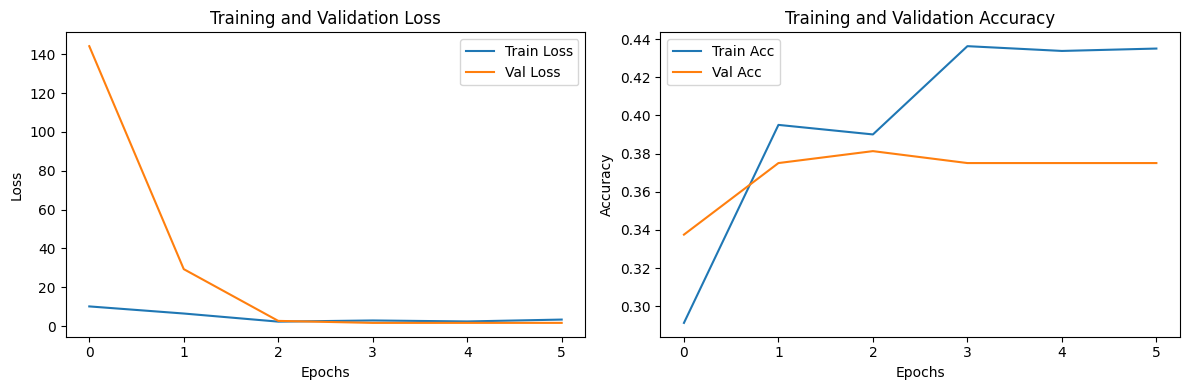

In [5]:
# for inputs, labels in spectro_train_loader:
#     print(f"Input shape: {inputs.shape}, Labels shape: {labels.shape}")
#     break

class CNN2DSpectro(nn.Module):
    def __init__(self, num_classes=6):
        super(CNN2DSpectro, self).__init__()
        # Convolutional layers
        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 4
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 5
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        # Fully connected layers
        self.classifier = nn.Sequential(
            nn.Linear(55296, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(128, num_classes),
        )
        
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x,1)
        x = self.classifier(x)
        return x

# class CNN2DSpectro(nn.Module):
#     def __init__(self, num_classes=6):
#         super(CNN2DSpectro, self).__init__()
#         vgg19 = models.vgg19()
#         vgg19.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
#         self.features = vgg19.features
#         self.classifier = nn.Sequential(
#             nn.Linear(55296, 128),
#             nn.ReLU(inplace=True),
#             nn.Dropout(),
#             nn.Linear(128, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(),
#             nn.Linear(1024, num_classes)
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = x.view(x.size(0), -1)
#         x = self.classifier(x)
#         return x

from torchvision import models

spectro_model = CNN2DSpectro().to(device)

spectro_learning_rate = 0.01
spectro_epochs = 6
spectro_criterion = nn.CrossEntropyLoss()
spectro_optimizer = torch.optim.Adam(spectro_model.parameters(), lr=spectro_learning_rate)

spectro_train_losses = []
spectro_val_losses = []
spectro_train_accs = []
spectro_val_accs = []

for epoch in range(spectro_epochs):
    # Train
    spectro_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in spectro_train_loader:
        spectro_optimizer.zero_grad()
        inputs = inputs.float()
        m = nn.LogSoftmax(dim=1)
        outputs = m(inputs)
        print("input shape train = ", inputs.shape)
        outputs = spectro_model(inputs)
        
        loss = spectro_criterion(outputs, labels.long())
        loss.backward()
        spectro_optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(spectro_train_loader)
    train_acc = correct_train / total_train
    spectro_train_losses.append(train_loss)
    spectro_train_accs.append(train_acc)
    print("loss at epoch ", epoch, " = ", running_loss)
    
    # Validate
    spectro_model.eval()
    running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in spectro_val_loader:
            inputs = inputs.float()
            print("input shape val = ", inputs.shape)
            outputs = spectro_model(inputs)
            loss = spectro_criterion(outputs, labels.long())
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    val_loss = running_loss / len(spectro_val_loader)
    val_acc = correct_val / total_val
    spectro_val_losses.append(val_loss)
    spectro_val_accs.append(val_acc)
    
    print("accuracy at epoch ", epoch, " = ", val_acc)
    
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(spectro_train_losses, label='Train Loss')
plt.plot(spectro_val_losses, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(spectro_train_accs, label='Train Acc')
plt.plot(spectro_val_accs, label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()